In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Загрузка данных
df = pd.read_csv('data/filtered_sellers_data.csv')
# Удаляем ненужные колонки, если есть (например, vk_city, если она пустая)
df = df.drop(columns=['id', 'seller_id', 'seller_sold_accounts_count',
                      'seller_active_accounts_count', 'status', 'extra_mobile_country', 'extra_signup_at',
                     'created_at', 'updated_at', 'can_buy', 'can_resell', 'extra_first_name', 'extra_last_name', 
                      'extra_country', 'seller_username'])
df.dropna()
print(df.shape)
df.head()

(31032, 11)


,price,origin,extra_gender,extra_friends_count,extra_followers_count,extra_age,extra_is_closed,extra_is_verified,extra_has_2fa,extra_has_mobile,is_resell
0,46,trash,male,267,267,20.0,False,False,False,True,True
1,55,trash,male,102,1253,21.0,False,False,False,True,True
2,46,trash,male,597,296,34.0,False,False,True,True,True
3,38,brute,female,154,18,19.0,False,False,False,False,True
4,818,brute,female,78,209,25.0,False,False,False,True,True


In [2]:
df = df.drop(columns=["is_resell"])

In [3]:
df = df[df['price'] < 200]
df = df[df['price'] > 1]
df.shape

(12035, 10)

In [4]:
import numpy as np


X = df.drop(columns=['price'])  # Все признаки, кроме цены
y = df['price']  # Целевая переменная - цена


# Разделяем на тренировочный и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-Hot Encoding для категориальных признаков
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# # Убедимся, что количество признаков совпадает в тренировочных и тестовых наборах
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)




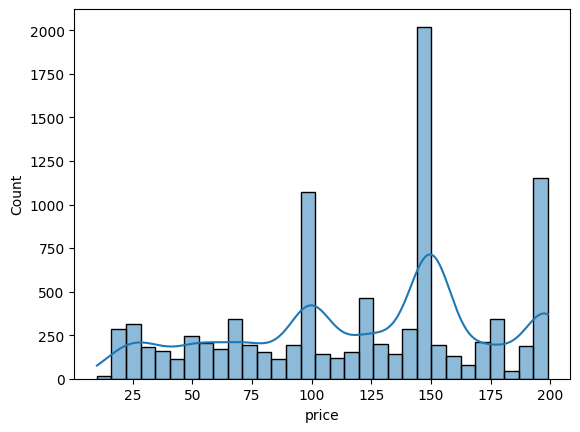

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построим график распределения цен
sns.histplot(y_train, kde=True)
plt.show()

In [6]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Обучаем модель
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели с использованием метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 7.9449592605059625
RMSE: 18.927001215609987


In [8]:
X_test.head()

,extra_friends_count,extra_followers_count,extra_age,extra_is_closed,extra_is_verified,extra_has_2fa,extra_has_mobile,origin_brute,origin_fishing,origin_retrieve,origin_stealer,origin_trash,extra_gender_male
24770,0,0,27.0,False,False,False,True,False,False,False,False,False,False
16063,331,108,33.0,False,False,False,True,True,False,False,False,False,True
19101,72,55,18.0,True,False,False,True,True,False,False,False,False,False
17858,156,47,30.0,True,False,False,True,True,False,False,False,False,False
28626,154,224,33.0,True,False,False,True,False,False,False,False,True,False


In [9]:
import joblib

# Сохранение модели
joblib.dump(model, 'random_forest_model.pkl')

print("Модель успешно сохранена!")

Модель успешно сохранена!
